# Nelder-Mead
### Carl Fredrik Berg, NTNU, 2023

The Nelder-Mead method (aka. downhill simplex method) is another numerical method to find the extrema of a real-valued multi-variable function. It is based on moving a <i>simplex</i> around by several simple operations based on the function value in the corner points of the simplex.

A simplex is a generalization of a triangle to arbitrary dimensions.  A $k$-simplex is a polytope of $k+1$ vertices in $k$-dimensional space. It is a line in 1D, and a triangle in 2D. For brevity, we will only use it in 2D.

The method was introduced by John Nelder and Roger Mead in 1965.

Consider the variable space $\mathbb{R}^n$, and a real-valued function $f \colon \mathbb{R}^n \to \mathbb{R}$ that we want to maximize. Further, assume an initial simplex described by the points $\vec{x}_0, \vec{x}_1, \vec{x}_2, \dots, \vec{x}_n$. The Nelder-Mead method is given by iterating the following steps, where $\alpha, \gamma, \rho$ and $\sigma$ are reflection, expansion, contraction and shrink coefficients, respectively:

1. <i>Order:</i> Order the test points (the corners of the simplex) according to their function values, i.e., such that $f(\vec{x}_0) \geq f(\vec{x}_1) \geq f(\vec{x}_2) \geq \dots \geq f(\vec{x}_n)$. Check whether to stop the algorithm by a convergence criteria, e.g., if the standard deviation of the value $f(\vec{x}_i)$ is smaller than a tolerance value.
2. </i>Centroid:</i> Calculate the centroid $\vec{x}_m$ of all points except $\vec{x}_n$:
  \begin{equation}
    \vec{x}_m = \frac{1}{n} \sum_{i=0}^{n-1} \vec{x}_i
  \end{equation}
3. <i>Reflection:</i> Find the <i>reflection point</i> $\vec{x}_r = \vec{x}_m + \alpha \left( \vec{x}_m - \vec{x}_n \right)$, where $\alpha > 0$ is the reflection coefficient. If $f(\vec{x}_0) \geq f(\vec{x}_r) > f(\vec{x}_{n-1})$, i.e., the function value at the reflection point is larger than the second to smallest, but not larger than the best point, then let $\vec{x}_n = \vec{x}_r$ and go back to the ordering in step 1. Else, continue with the next point.
4. <i>Expansion:</i> If $f(\vec{x}_r) > f(\vec{x}_0)$, i.e., the reflection point is the best point, then do the following:
  - Find the <i>expansion point</i> $\vec{x}_e = \vec{x}_r + \gamma\left(\vec{x}_r - \vec{x}_m\right)$, where $\gamma > 1$ is the expansion coefficient.
  - If $f(\vec{x}_e) > f(\vec{x}_r)$, i.e., the expansion point is better than the reflection point, then let $\vec{x}_n = \vec{x}_e$, and return to the ordering in step 1.
  - Else if $f(\vec{x}_e) \leq f(\vec{x}_r)$, i.e., the reflection point is better than the expansion point, then let $\vec{x}_n = \vec{x}_r$, and go to step 1.
5. <i>Contraction:</i> If we arrive here, then we have $f(\vec{x}_r) \leq f(\vec{x}_{n-1})$, thus the reflection point is smaller than the second to smallest point.
  - If $f(\vec{x}_r)>f(\vec{x}_n)$:
    1. Compute the contraction point on the outside as $\vec{x}_c = \vec{x}_m + \rho(\vec{x}_r - \vec{x}_m)$, where the contraction coefficient is $0 < \rho \leq 0.5$
    2. If $f(\vec{x}_c) > f(\vec{x}_r)$, i.e., the contraction point is better than the reflection point, then let $\vec{x}_n = \vec{x}_c$, and go to step 1.
    3. Else, if $f(\vec{x}_c) \leq f(\vec{x}_r)$, go to step 6.
  - If $f(\vec{x}_r) \leq f(\vec{x}_n)$:
    1. Compute the contraction point on the inside as $\vec{x}_c = \vec{x}_m + \rho(\vec{x}_n - \vec{x}_m)$.
    2. If $f(\vec{x}_c) > f(\vec{x}_n)$, i.e., the contraction point is better than the worst point in the current simplex, then let $\vec{x}_n = \vec{x}_c$, and go to step 1.
    3. Else, if $f(\vec{x}_c) \leq f(\vec{x}_n)$, go to step 6.
6. <i>Shrink:</i> In this case we want to shrink the simplex towards the best point, i.e., towards the point $\vec{x}_0$: $\vec{x}_i = \vec{x}_0 + \sigma (\vec{x}_i - \vec{x}_0)$ for all $i \in [1,n]$, where $\sigma < 1$ is the shrink coefficient. Then go to step 1.

Common values for the reflection, expansion, contraction and shrink coefficients are $\alpha = 1, \gamma = 2, \rho = 1/2$ and $\sigma = 1/2$.


Iteration  1  Error:  10.877958331772943
Iteration  2  Error:  3.0578083322918497
Iteration  3  Error:  3.027558138583263
Iteration  4  Error:  1.4166237396774175
Iteration  5  Error:  1.3096738761873414
Iteration  6  Error:  1.5757483855960759
Iteration  7  Error:  1.453957326532723
Iteration  8  Error:  0.28823202642060597
Iteration  9  Error:  0.4640958272844136
Iteration  10  Error:  0.31410698777252977
Iteration  11  Error:  0.23941445337102016
Iteration  12  Error:  0.18440589905732088
Iteration  13  Error:  0.10131363643386751
Iteration  14  Error:  0.05546026252624671
Iteration  15  Error:  0.0932116773086365
Iteration  16  Error:  0.04675742118621351
Iteration  17  Error:  0.028903604493644326
Iteration  18  Error:  0.014524580623280527
Iteration  19  Error:  0.0062817506602917145
Number of iterations:  19


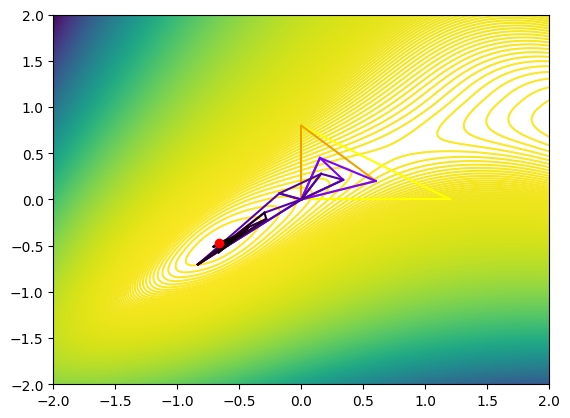

In [4]:
import numpy as np
import matplotlib.pyplot as plt

cmap = plt.get_cmap('gnuplot')


def hObjectiveFunction(fx,fy):
    return -np.abs((3 - fx)*fx-3*fy+1.0)**(7.0/3.0)-np.abs((3-fy)*fy-fx+1.0)**(7.0/3.0)

fDelta = 0.025
aafy, aafx = np.mgrid[slice(-2.0, 2.0 + fDelta, fDelta),slice(-2.0, 2.0 + fDelta, fDelta)]
plt.contour(aafx, aafy, hObjectiveFunction(aafx,aafy),1000)#, cmap=cm.Purples_r)

def plotSimplex(aaSimplex):
    plt.plot(aaSimplex[:,0],aaSimplex[:,1],color=cmap(fError/fMaxError))
    plt.plot((aaSimplex[-1,0],aaSimplex[0,0]),(aaSimplex[-1,1],aaSimplex[0,1]),color=cmap(fError/fMaxError))
    return None

#Coefficients
fAlpha=1
fGamma=2
fRho=0.5
fSigma=0.5

def updateFuncVal(aaSimplex):
    for ii in range(0,3):
        aaSimplex[ii,2]=hObjectiveFunction(aaSimplex[ii,0],aaSimplex[ii,1])
    return aaSimplex

def updateFuncValSingle(aPoint):
    aPoint[2]=hObjectiveFunction(aPoint[0],aPoint[1])
    return aPoint

def sortPoints(aaSimplex):
    iChange=1
    while iChange>0:
        iChange=0
        if aaSimplex[0,2]<aaSimplex[1,2]:
            aPointTemp=np.copy(aaSimplex[0,:])
            aaSimplex[0,:]=np.copy(aaSimplex[1,:])
            aaSimplex[1,:]=np.copy(aPointTemp)
            iChange+=1
        if aaSimplex[1,2]<aaSimplex[2,2]:
            aPointTemp=np.copy(aaSimplex[1,:])
            aaSimplex[1,:]=np.copy(aaSimplex[2,:])
            aaSimplex[2,:]=np.copy(aPointTemp)
            iChange+=1
    return aaSimplex

def hNedlerMead(aaSimplex):
    #Calculate centroid
    aCentroid=np.array([np.sum(aaSimplex[:-1,0])/2.0,np.sum(aaSimplex[:-1,1])/2.0,0.0])
    aCentroid=updateFuncValSingle(aCentroid)
    #Find reflection point
    aReflection=aCentroid+fAlpha*(aCentroid-aaSimplex[-1,:])
    aReflection=updateFuncValSingle(aReflection)
    if aReflection[2]>aaSimplex[1,2]:
        if aReflection[2]<aaSimplex[0,2]:
            #Replace the worst point with the reflection point
            aaSimplex[2,:]=np.copy(aReflection)
        else:
            #Find expansion point
            aExpansion=aReflection+fGamma*(aReflection-aCentroid)
            aExpansion=updateFuncValSingle(aExpansion)
            if aExpansion[2] > aReflection[2]:
                aaSimplex[2,:]=np.copy(aExpansion)
            else:
                aaSimplex[2,:]=np.copy(aReflection)
    else:
        #Calculate contraction point inside or outside
        if aReflection[2]>aaSimplex[2,2]:
            #Check contration outside
            aContraction=aCentroid+fRho*(aReflection-aCentroid)
            aContraction=updateFuncValSingle(aContraction)
        else:
            #Check contration inside
            aContraction=aCentroid+fRho*(aaSimplex[2,:]-aCentroid)
            aContraction=updateFuncValSingle(aContraction)
        if (aReflection[2]>aaSimplex[2,2] and aContraction[2]>aReflection[2]) or (aReflection[2]<=aaSimplex[2,2] and aContraction[2]>aaSimplex[2,2]):
            aaSimplex[2,:]=np.copy(aContraction)
        #Shrink
        else:
            for jj in range(1,3):
                aaSimplex[jj,:]=aaSimplex[0,:]+fSigma*(aaSimplex[jj,:]-aaSimplex[0,:])
    aaSimplex=updateFuncVal(aaSimplex)
    return aaSimplex

#Define the initial simplex
aaSimplex=np.zeros((3,3))
aaSimplex[0,:-1]=[0.0,0.0]
aaSimplex[1,:-1]=[1.2,0.0]
aaSimplex[2,:-1]=[0.0,0.8]

aaSimplex=updateFuncVal(aaSimplex)
aaSimplex=sortPoints(aaSimplex)

#Set convergence criteria
fEps=1E-2
iMaxIt=20
fMaxError=np.sqrt((aaSimplex[0,2]-aaSimplex[2,2])**2)
fError=fMaxError
plotSimplex(aaSimplex)

ii=0
while ii<iMaxIt and fError>fEps:
    ii+=1
    aaSimplex=hNedlerMead(aaSimplex)
    sortPoints(aaSimplex)
    fError=np.sqrt((aaSimplex[0,2]-aaSimplex[2,2])**2)
    print('Iteration ',ii,' Error: ',fError)
    plotSimplex(aaSimplex)

plt.scatter(aaSimplex[0,0],aaSimplex[0,1],color='r',zorder=2)

print('Number of iterations: ',ii)

plt.show()